# Image Cartoonifier.
## Team : 
### Hossam Fawzy Elsafty(23)
### Yahia elshahawy(87)

In [0]:
from google.colab import files
import cv2 as cv
import matplotlib.pyplot as plt


In [0]:
def edge_detection(image):
  laplace = cv.Laplacian(image, ddepth=-1,ksize=5)
  display_image(laplace,"Edges" , True)
  return laplace

In [0]:
def bilateral_filter(image, repetitionCount):
      for i in range(repetitionCount):
         image = cv.bilateralFilter(image, 9, 9, 7)
      display_image(BGR_to_RGB(image),"bilateral",False)
      return image

In [0]:
def display_image(image,title,isGray):
  plt.grid("false")
  plt.title(title)
  if(isGray):
    plt.imshow(image,cmap='gray')
  else :
    plt.imshow(image)

  return

In [0]:
def BGR_to_RGB(image):
  image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
  return image

In [0]:
def RGB_to_Gray(image):
  gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
  display_image(gray_image,"Grayscale Image",True)
  return gray_image

In [0]:
def noise_reduction(image):
  median_image=cv.medianBlur(gray_image,7)
  display_image(median_image,"blur picture",True)
  return median_image

In [0]:
def comapre2Images(im1,im1_title,im2,im2_title):
  fig = plt.figure()
  ax1=fig.add_subplot(1,2,1)
  ax1.set_title(im1_title)
  ax1.grid(False)
  ax1.imshow(im1,cmap='gray')
  ax2=fig.add_subplot(1,2,2)
  ax2.set_title(im2_title)
  ax2.grid(False)
  ax2.imshow(im2,cmap='gray')
  plt.show()

In [0]:
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


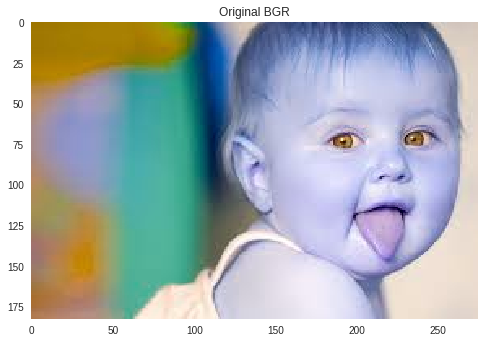

In [0]:
image = cv.imread('images.jpeg')
display_image(image,"Original BGR",False)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


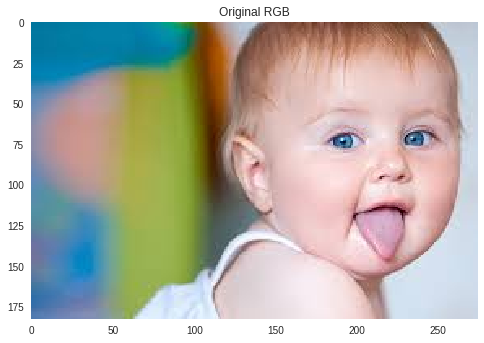

In [0]:
RGB_image = BGR_to_RGB(image)
display_image(RGB_image,"Original RGB",False)

***First Step:*** *Tranform image to grayscale*
* Since Laplacian filters use grayscale images, we must convert to Grayscale, this could be easily done using the CvtColor()  in RGB_to_Gray()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


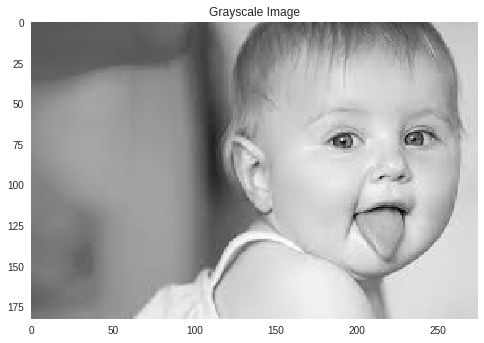

In [0]:
gray_image = RGB_to_Gray(RGB_image)

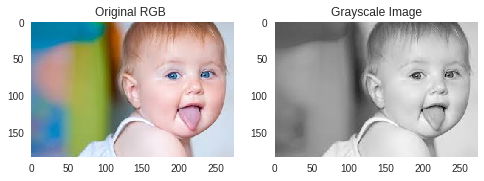

In [0]:
comapre2Images(RGB_image,"Original RGB ",gray_image,"Grayscale Image")

***2nd Step:*** *Noise Reduction Using Median Filter*
* For noise reduction, we apply a Median filter with a 7 × 7 square aperture. This could be
done using the cv.medianBlur() in noise_reduction()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


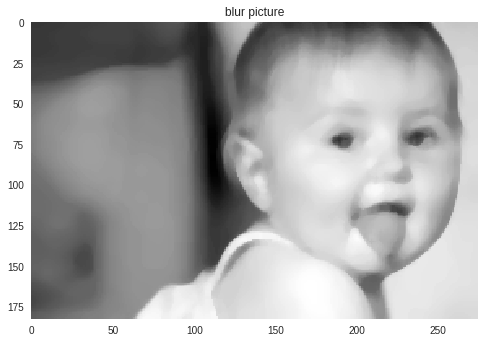

In [0]:
smooth_image = noise_reduction(gray_image)

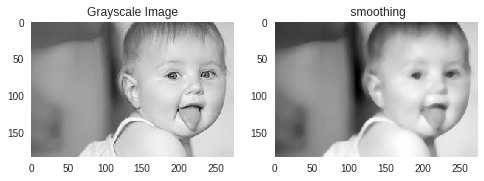

In [0]:
comapre2Images(gray_image,"Grayscale Image",smooth_image," smoothing")

***3rd Step:*** * Edge Detection Using Laplacian Filter*
* a Laplacian filter of aperture size = 5 is used for edge detection.
* using cv.Laplacian() with ksize = 5 in edge_detection()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


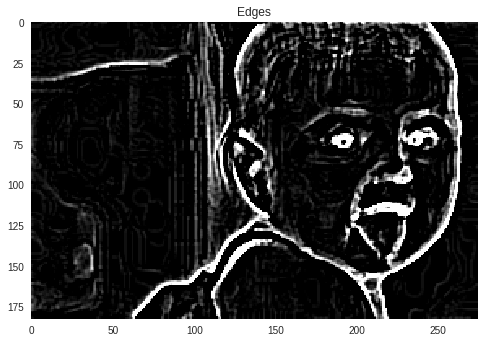

In [0]:
 laplace = edge_detection(smooth_image)

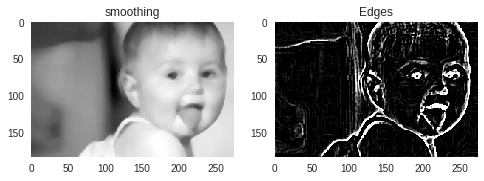

In [0]:
comapre2Images(smooth_image,"smoothing",laplace,"Edges")

**4th Step: *Applying binary threshold***
* The Laplacian filter produces edges with varying brightness, so to make the edges look more
like a sketch we apply **a binary threshold** to make the edges either white or black. This could
be done using cv.threshold() OpenCV funciton with threshold value = 125.

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


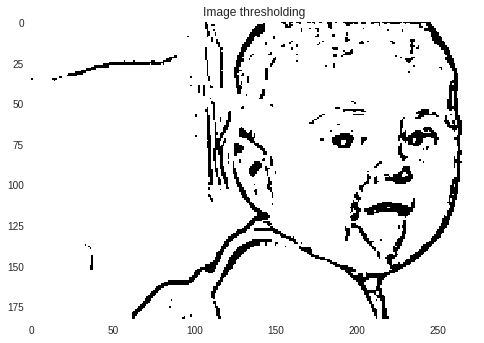

In [0]:
ret,thresh = cv.threshold(laplace,125,255,cv.THRESH_BINARY_INV)
display_image(thresh,"Image thresholding",True)

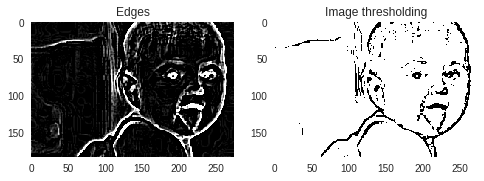

In [0]:
comapre2Images(laplace,"Edges",thresh,"Image thresholding")

**5th Step: *Generating a color painting and a cartoon*** 
* since A strong bilateral filter smoothes flat regions while keeping edges sharp, and is therefore great as
an automatic cartoonifier or painting filter, **except that it is extremely slow** (that is, measured
in seconds or even minutes rather than milliseconds!).
  - ***Trick1:*** We will therefore use some tricks to obtain a nice cartoonifier that still runs at an acceptable speed. The most important trick we can use is to **perform bilateral filtering at a lower resolution.**  It will have a similar effect as
at full resolution. This could be done using Resize() function for resizing the image


---



/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


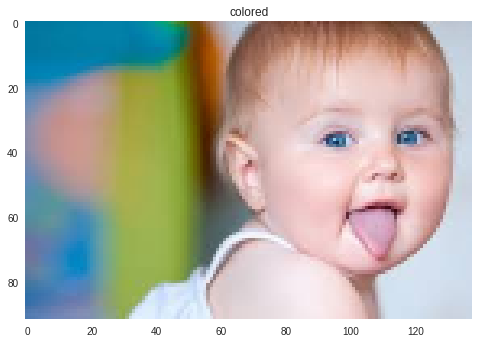

In [0]:
resized_image=cv.resize(image,(0,0),fx=0.5,fy=0.5)
display_image(BGR_to_RGB(resized_image),"colored","Resized Image")



  - ***Trick2:*** Rather than applying a large bilateral filter,** we will apply many small bilateral filters** to
produce a strong cartoon effect in less time. **We will truncate the filter so that instead of
performing a whole filter (for example, a filter size of 21 x 21), it just uses the minimum filter
size needed for a convincing result (for example, with a filter size of just 9 x 9).**
    - We have four parameters in  that control the bilateral filter: color strength, positional strength,
size, and repetition count. Suitable values for these parameters are:
      - Color strength: 9
      - Positional strength: 7
      - Size: 9
      - Repetition count: 7
        - for each repition count we apply bilateralFilter to image using cv.bilateralFilter(image, 9, 9, 7)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


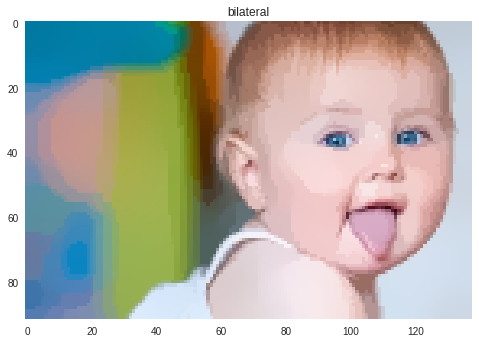

In [0]:
bilateral = bilateral_filter(resized_image,7)

In [0]:
bilateral=cv.resize(bilateral,(image.shape[1],image.shape[0]))


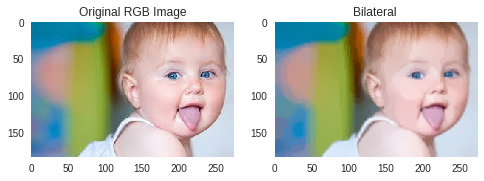

In [0]:
comapre2Images(BGR_to_RGB(image),"Original RGB Image",BGR_to_RGB(bilateral),"Bilateral ")

***Last Step:*** **applying edge mask to the painting from bilateral filter**
- We can overlay the edge mask that we found earlier (using thresholding on laplacian filter).
- To overlay the edge mask "sketch" onto the bilateral filter "painting",  **we can start with a black background and copy the "painting" pixels that aren’t edges in the "sketch" mask. This could also be done using the
cv.bitwise_and().**
- the mask (edge mask) consists of black pixels = (0), when ANDed with the actual bilateral image it result the mask overlaying the painting

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


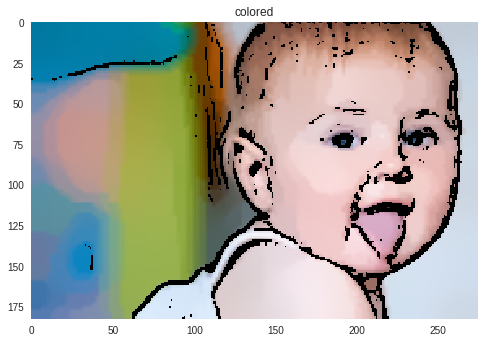

In [0]:
thresh2=cv.cvtColor(thresh,cv.COLOR_GRAY2BGR)
cartoon=cv.bitwise_and(bilateral,thresh2)
display_image(BGR_to_RGB(cartoon),"colored",False)

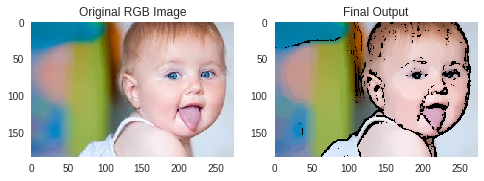

In [0]:
comapre2Images(RGB_image,"Original Image",BGR_to_RGB(cartoon),"Final Output")